## Understanding Representation Learning with Deep Convolutionsl Generative Adversarial Networks

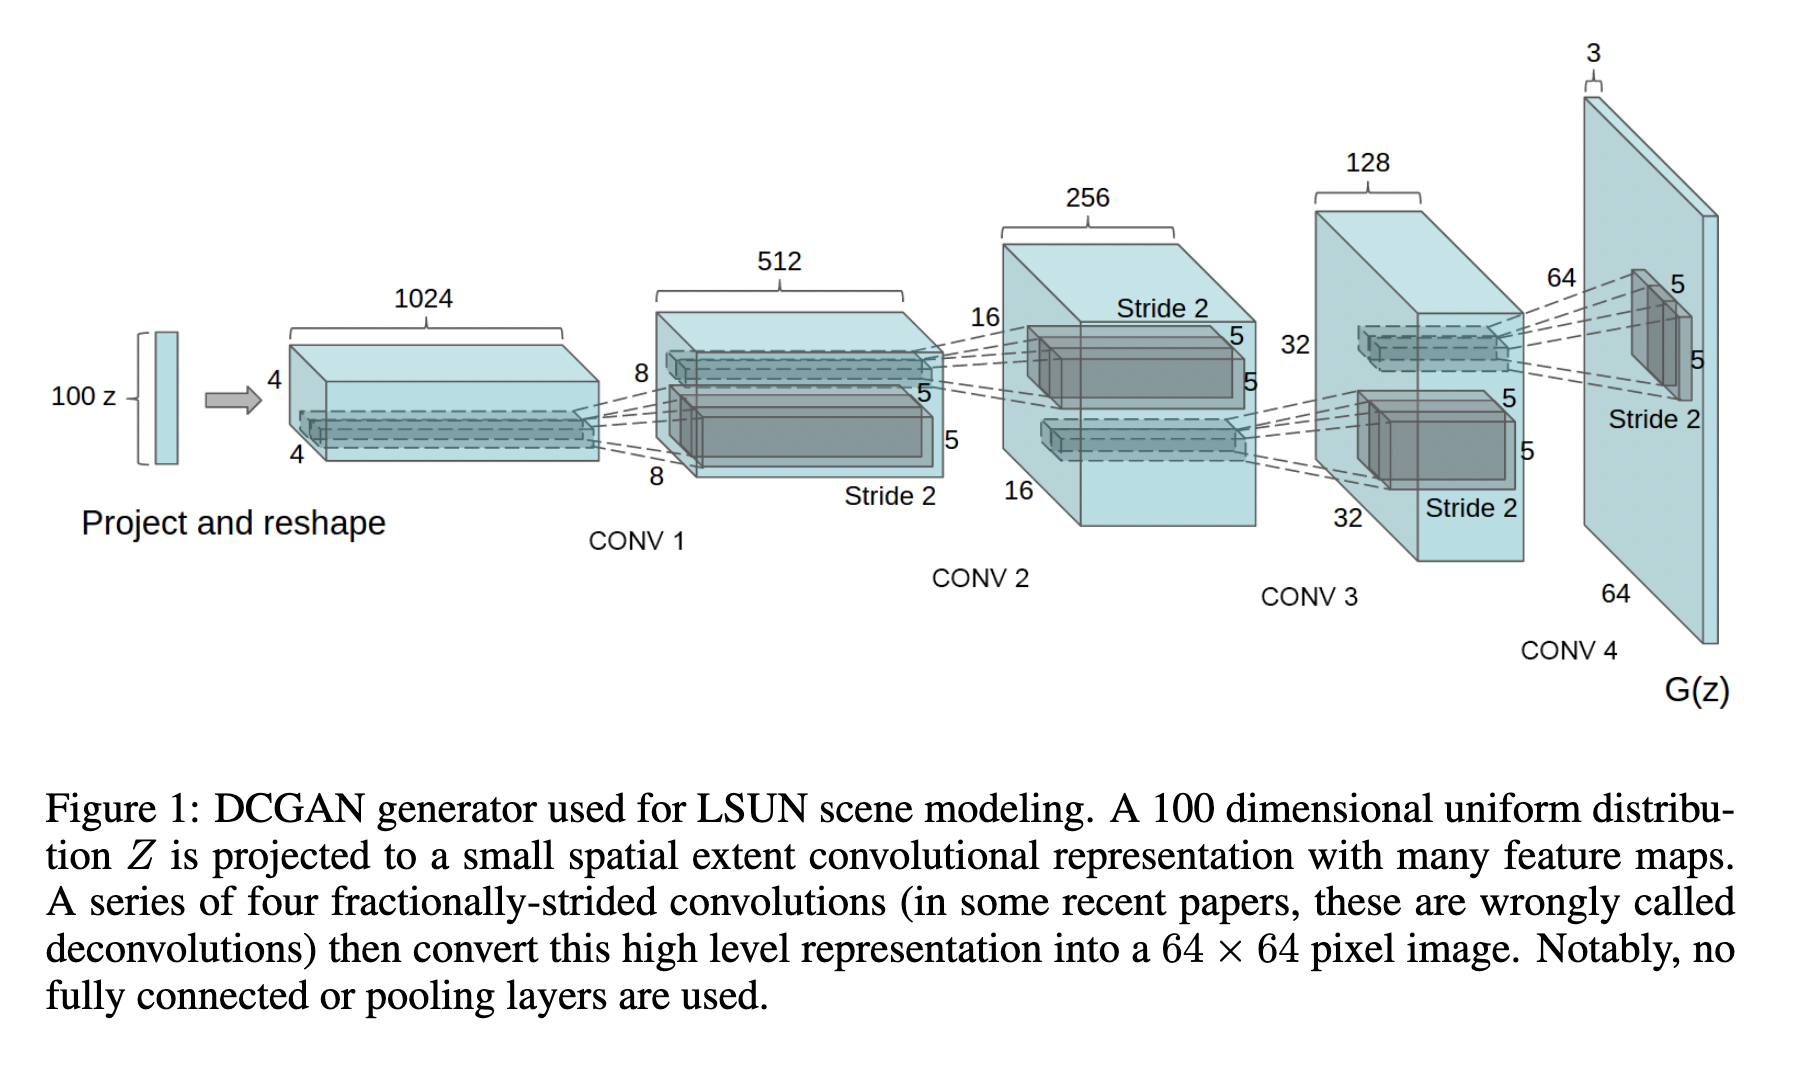

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

print(f'''TensorFlow: {tf.__version__}
Physical Devices: {physical_devices}''')

TensorFlow: 2.9.2
Physical Devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
class Discriminator(keras.Model):
    def __init__(self, filters):
        self.disc = keras.Sequential([
            layers.Conv2D(filters=filters, kernel_size=4, strides=2, padding='same'), 
            layers.LeakyReLU(alpha=0.1),
            _block(filters*2, 4, 2, 'same'),
            _block(filters*4, 4, 2, 'same'),
            _block(filters*4, 4, 2, 'same')
        ])
    
    def _block(self, filters, kernel_size, stride, padding):
        return keras.Sequential([
            layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=stride, padding=padding),
            layers.BatchNormalization(),
            layers.LeakyReLU(alpha=0.1)
        ])
    